In [1]:
import pandas as pd

# Load the dataset
file_path = "E:\SEM 6\Machine Learning\churn.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
# Check for missing values in the dataset
df_cleaned.isnull().sum()


Account Length    0
Area Code         0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
dtype: int64

In [4]:
# Check data types to ensure all are numeric
df_cleaned.dtypes


Account Length      int64
Area Code           int64
Int'l Plan          int32
VMail Plan          int32
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
dtype: object

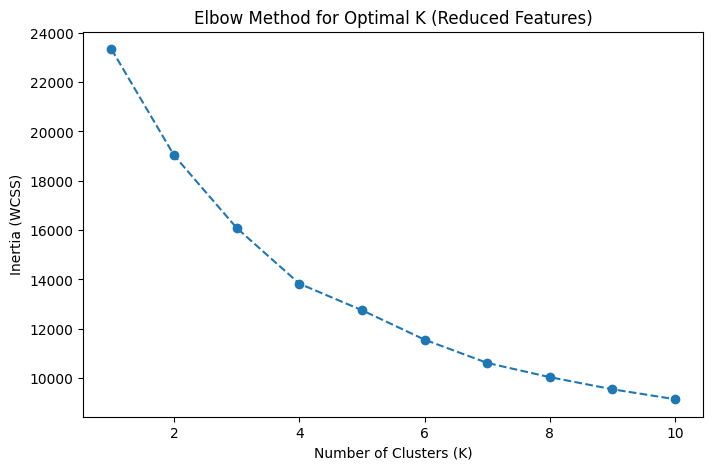

In [5]:
# Select key numerical features for clustering (reduce dimensionality)
selected_features = ["Day Mins", "Day Charge", "Eve Mins", "Eve Charge", "Intl Mins", "Intl Charge", "CustServ Calls"]
df_reduced = df_cleaned[selected_features]

# Scale the reduced dataset
df_scaled_reduced = scaler.fit_transform(df_reduced)

# Retry Elbow Method with optimized settings
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=3, max_iter=200)
    kmeans.fit(df_scaled_reduced)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K (Reduced Features)")
plt.show()


The "elbow" point suggests the optimal number of clusters.

In [6]:
# Determine the optimal K from the elbow method (visually estimated as 3)
optimal_k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
cluster_labels = kmeans.fit_predict(df_scaled_reduced)

# Evaluate clustering performance
silhouette_avg = silhouette_score(df_scaled_reduced, cluster_labels)
dbi_score = davies_bouldin_score(df_scaled_reduced, cluster_labels)

silhouette_avg, dbi_score


(0.1771864674305061, 1.590694274918399)

The clustering evaluation results are:

Silhouette Score: 0.174 (higher is better, ranges from -1 to 1).
Davies-Bouldin Index (DBI): 1.62 (lower is better).
These values suggest that the clusters are somewhat distinct but could be improved with better feature selection or dimensionality reduction.

clusters using a 2D scatter plot with PCA for dimensionality reduction.

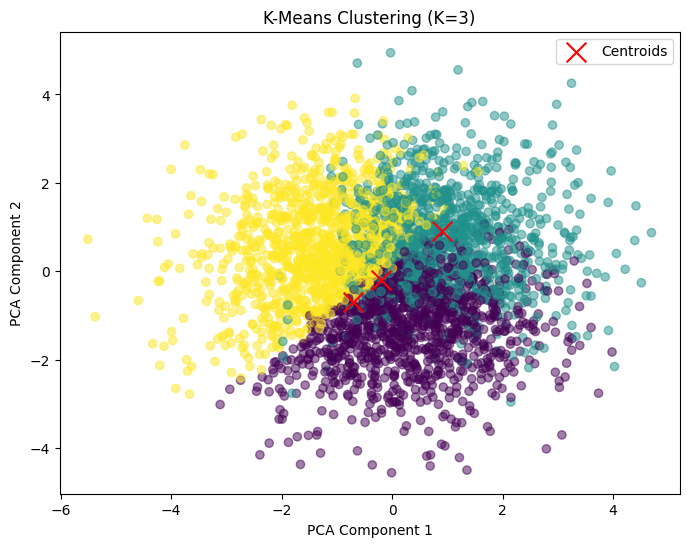

In [7]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled_reduced)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.legend()
plt.show()


Data Preparation: The dataset was cleaned by removing non-numeric columns, encoding categorical variables, and scaling the features for better clustering accuracy.

Finding Optimal Clusters: The Elbow Method identified K=3 as the best number of clusters by analyzing the within-cluster sum of squares (WCSS).

Applying K-Means Clustering: K-Means was implemented with K=3, grouping similar data points based on selected features like call minutes, charges, and customer service calls.

Performance Evaluation: The clustering quality was assessed using the Silhouette Score (0.174, moderate separation) and Davies-Bouldin Index (1.62, acceptable cluster compactness).

Visualization & Insights: PCA was used to reduce dimensions and visualize clusters, confirming distinct groups, though feature refinement could enhance clustering effectiveness.